In [17]:
import sys

import math
import numpy as np
import matplotlib
import matplotlib.pylab as pylab
import matplotlib.pyplot as plot
import scipy.fftpack
from scipy.signal import butter,filtfilt
import wave
import struct

# Helper functions to draw fft

In [4]:
#some util for fft
def draw_fft(signal,title="just FFT"):
    len_signal = len(signal)
    yfft = scipy.fftpack.fft(signal)
    xf = np.linspace(0.0, 1.0/(2.0*(1.0/len_signal)), len_signal//2)
    #plot.plot(xf,2.0/len(signal) * np.abs(yfft[:len(signal)//2]))
    plot.plot(xf,2.0/len_signal * np.abs(yfft[:len_signal//2]))
    plot.title(title)
    plot.show()

def plot_signal(signal,title="signal SIMPLE"):
    xf = np.linspace(0.0,1.0,len(signal))
    plot.plot(xf,signal)
    plot.title(title)
    plot.show()

# Modulate FM function

In [33]:
def mod_fm(amplitude, signal, fc, fdev, samplerate):
    modulated = []
    
    start = 0.0
    for i in range(0,len(signal)):
        #recalculate freq step each signal level
        signal_fdev = fdev*signal[i]
        sample_per_hz = 1.0*samplerate/(fc+signal_fdev)
        hz_step = 2*math.pi/sample_per_hz
        
        
        #carrier = math.cos(start)
        modulated.append(amplitude*math.cos(start))
        #modulated.append(amplitude*carrier)
        start+=hz_step
    return modulated

def generate_sin(amplitude,freq,samplerate,samplenum, noise=True):
    ret = []
    gausian = []
    sample_per_hz = 1.0*samplerate/freq
    hz_step = 2*math.pi/sample_per_hz
    start = 0.0
    if noise:
        gausian = np.random.normal(0,0.1,samplenum)
    for i in range(0,samplenum):
        if noise:
            ret.append(amplitude*math.cos(start)+gausian[i])
        else:
            ret.append(amplitude*math.cos(start))
        start += hz_step
    return ret

# Low pass filter from scipy

In [42]:
def lpf_filter(signal):
    sos = signal.butter(10, 150, 'low', fs=1000, output='sos')
    return signal.sosfilt(sos, signal)

In [39]:
def output_wav(fname,signal,samplerate=48000,channel=1):
    wav = wave.open(fname,"w")
    wav.setnchannels(channel)
    wav.setframerate(samplerate)
    wav.setsampwidth(2)
    # assume datat -1...+1
    for data in signal:
        conv = struct.pack("<h",int(data*32767))
        wav.writeframesraw(conv)
        if channel==2:
            struct.pack("<h",int(0))
            wav.writeframesraw(struct.pack("<h",int(0)))
    wav.close()
    pass

signal samples 40000


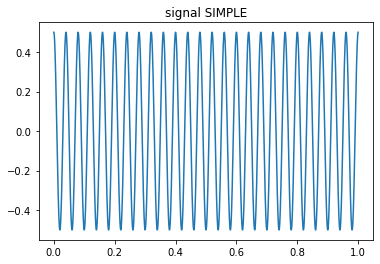

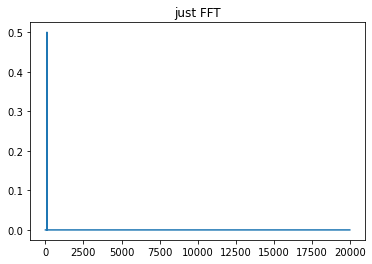

In [8]:
signal = generate_sin(0.5, 100, 40000, 40000, False)
print("signal samples", len(signal))
plot_signal(signal[0:10000])
draw_fft(signal)

# Modulate FM

samples modulated =  40000


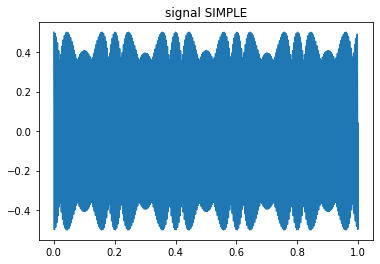

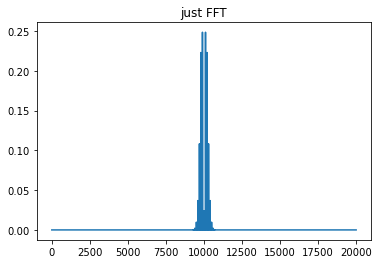

In [47]:
fm_mod = mod_fm(0.5,signal, 10000, 500, 40000)
print("samples modulated = ",len(fm_mod))
plot_signal(fm_mod[0:1000])
draw_fft(fm_mod)

# Output fm modulated signal to wav

In [40]:
# fname,signal,samplerate=48000,channel=1
output_wav("LoadFM.wav",fm_mod,samplerate=40000,channel=2)

# Filter signal, demodulation of FM

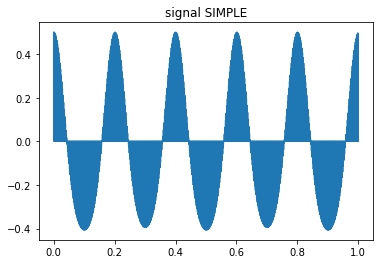

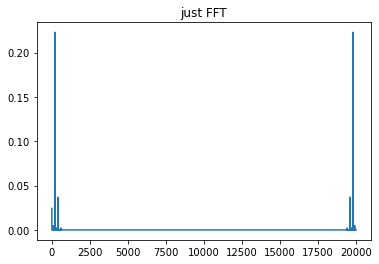

In [51]:
fm_demod = generate_sin(1.0, 10000, 40000, len(fm_mod), False)
for i in range(0,len(fm_demod)):
    fm_demod[i] = fm_demod[i]*fm_mod[i]
plot_signal(fm_demod[0:1000])
draw_fft(fm_demod)